###Modelos de Regressão

In [ ]:
import pandas as pd

Criando um dataframe com dados ficticios

In [ ]:
data = {
    "idade": [18,74,52,35,19,45],
    "salario": [1500,5600,4800,3500,1800,2750],
    "comprou": [0,1,1,0,0,1]
}
df = pd.DataFrame(data)
df

,idade,salario,comprou
0,18,1500,0
1,74,5600,1
2,52,4800,1
3,35,3500,0
4,19,1800,0
5,45,2750,1


##Divisão dos dados de treino e teste

In [ ]:
X = df[["idade", "salario"]]
y = df["comprou"]

###Import do modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

####Criação do modelo

In [ ]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [ ]:
model.coef_

array([[ 0.54689594, -0.00158418]])

#Dados de teste

In [ ]:
data_teste = {
    "idade": [38, 52],
    "salario": [3500, 4800]
}
df_teste = pd.DataFrame(data_teste)
df_teste


,idade,salario
0,38,3500
1,52,4800


####Previsão do modelo

In [ ]:
previsao = model.predict(df_teste)
previsao

array([0, 1])

In [ ]:
data = {
    "gastos": [100, 150, 200, 250, 300, 350],
    "compras": [20, 30, 38, 32, 60, 71]
}
df = pd.DataFrame(data)
df

,gastos,compras
0,100,20
1,150,30
2,200,38
3,250,32
4,300,60
5,350,71


In [ ]:
X = df[["gastos"]]
y = df["compras"]

###Regressao Linear

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
df_teste = pd.DataFrame({"gastos": [1000]})
df_teste

,gastos
0,1000


In [ ]:
previsao = model.predict(df_teste)
previsao

array([191.96190476])

###Dataset Gorgetas

In [ ]:
data = r'/content/drive/MyDrive/dscience-infinity/dados/tips.csv'
df = pd.read_csv(data)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df['time'] = df['time'].map({"Lunch": 0, "Dinner": 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    int64  
 6   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 13.5+ KB


In [ ]:
df['sex'] = df['sex'].map({"Female": 0, "Male": 1})

In [ ]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['smoker'] = df['smoker'].map({"No": 0, "Yes": 1})

In [ ]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
df.drop(['day'], axis=1).corr()

,total_bill,tip,sex,smoker,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,0.054921,-0.133178
time,0.183118,0.121629,0.205231,0.054921,1.000000,0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.103411,1.000000


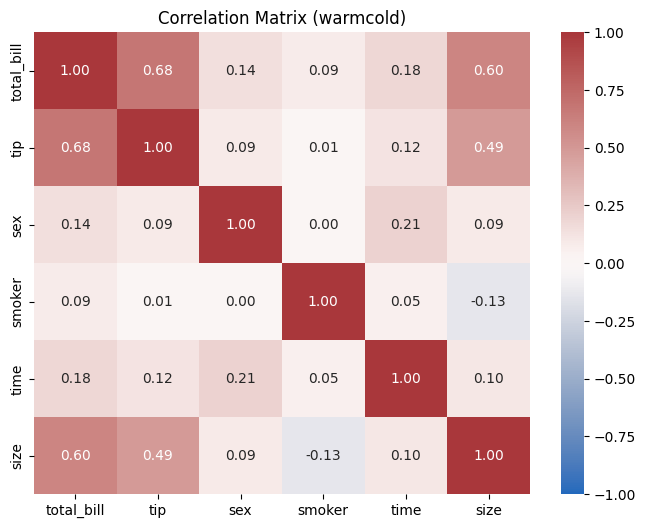

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.drop(['day'], axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt=".2f",vmin=-1, vmax=1,)
plt.title('Correlation Matrix (warmcold)')
plt.show()

In [ ]:
Y = df['tip'] #apenas o meu target
x_numerico = df.drop(['tip', 'day'], axis=1) # apenas valores numericos
x_categorico = df[['day']] #apenas valores categoricos

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()

In [ ]:
teste = encoder.fit(x_categorico)
x_categorico = teste.fit_transform(x_categorico)

In [ ]:
x_categorico = pd.DataFrame(x_categorico.toarray())
x_categorico.head()

,0,1,2,3
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [ ]:
x_categorico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       244 non-null    float64
 1   1       244 non-null    float64
 2   2       244 non-null    float64
 3   3       244 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
x = pd.concat([x_numerico, x_categorico], axis=1)

In [ ]:
x

,total_bill,sex,smoker,time,size,0,1,2,3
0,16.99,0,0,1,2,0.0,0.0,1.0,0.0
1,10.34,1,0,1,3,0.0,0.0,1.0,0.0
2,21.01,1,0,1,3,0.0,0.0,1.0,0.0
3,23.68,1,0,1,2,0.0,0.0,1.0,0.0
4,24.59,0,0,1,4,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
239,29.03,1,0,1,3,0.0,1.0,0.0,0.0
240,27.18,0,1,1,2,0.0,1.0,0.0,0.0
241,22.67,1,1,1,2,0.0,1.0,0.0,0.0
242,17.82,1,0,1,2,0.0,1.0,0.0,0.0


In [ ]:
x.columns = ['total_bill', 'sex', 'smoker', 'time', 'size', "0", '1', '2', '3']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x

,0,1,2,3,4,5,6,7,8
0,-0.314711,-1.343353,-0.784789,0.621582,-0.600193,-0.290593,-0.744406,1.486784,-0.583660
1,-1.063235,0.744406,-0.784789,0.621582,0.453383,-0.290593,-0.744406,1.486784,-0.583660
2,0.137780,0.744406,-0.784789,0.621582,0.453383,-0.290593,-0.744406,1.486784,-0.583660
3,0.438315,0.744406,-0.784789,0.621582,-0.600193,-0.290593,-0.744406,1.486784,-0.583660
4,0.540745,-1.343353,-0.784789,0.621582,1.506958,-0.290593,-0.744406,1.486784,-0.583660
...,...,...,...,...,...,...,...,...,...
239,1.040511,0.744406,-0.784789,0.621582,0.453383,-0.290593,1.343353,-0.672593,-0.583660
240,0.832275,-1.343353,1.274228,0.621582,-0.600193,-0.290593,1.343353,-0.672593,-0.583660
241,0.324630,0.744406,1.274228,0.621582,-0.600193,-0.290593,1.343353,-0.672593,-0.583660
242,-0.221287,0.744406,-0.784789,0.621582,-0.600193,-0.290593,1.343353,-0.672593,-0.583660


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, Y_treino, Y_teste = train_test_split(x, Y, test_size=0.2)

In [ ]:
modelo = LinearRegression()
modelo.fit(x_treino, Y_treino)

LinearRegression()

In [ ]:
previsao = modelo.predict(x_teste)
previsao

array([3.37091936, 2.58572803, 3.25223727, 2.06520551, 2.60922862,
       1.70094951, 2.12272713, 2.32500241, 2.97970008, 3.72912439,
       4.48061584, 2.28289348, 2.19254259, 2.9643737 , 2.88399054,
       4.43149463, 1.89511846, 2.20309161, 4.74034473, 2.76515197,
       4.32888846, 1.96218197, 3.14673673, 4.67511947, 5.15433373,
       3.31722843, 2.71638049, 5.47601251, 2.4257463 , 3.13380103,
       2.90554708, 1.2933418 , 3.01525496, 2.61877331, 2.59447564,
       1.92655641, 2.93582879, 2.26255819, 1.97438233, 3.8779455 ,
       2.88104126, 3.87312121, 3.28264082, 3.47350285, 5.14630306,
       2.66052887, 2.40209563, 2.51656948, 1.93805305])

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
error_r2 = r2_score(Y_teste, previsao)
error_MSA = mean_absolute_error(Y_teste, previsao)
error_MSE = mean_squared_error(Y_teste, previsao)
print(error_r2)
print(error_MSA)
print(error_MSE)

0.5634979575895792
0.8289719834193268
1.236785832326211


Previsões para os dados de teste:
   idade  salario  comprou_previsao
0     38     3500          0.361112
1     52     4800          0.596095


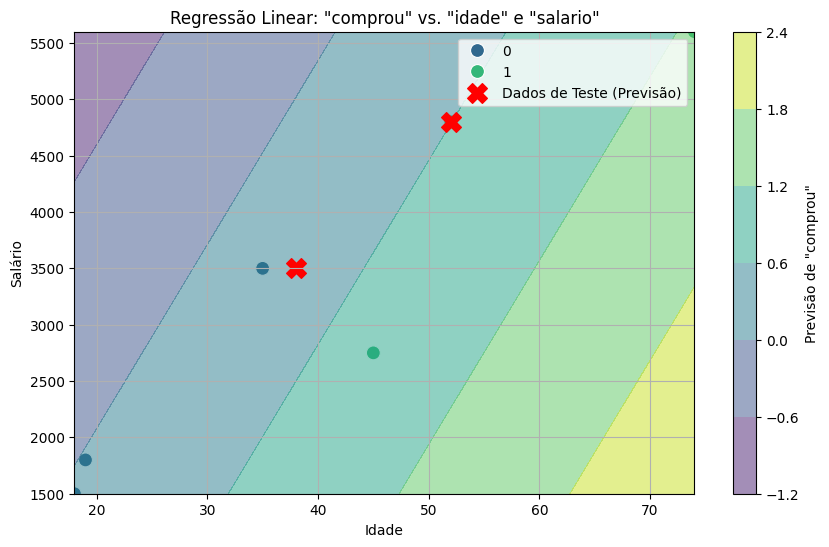

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy for np.linspace and np.meshgrid

# Original Data
data = {
    "idade": [18, 74, 52, 35, 19, 45],
    "salario": [1500, 5600, 4800, 3500, 1800, 2750],
    "comprou": [0, 1, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Test Data
data_teste = {
    "idade": [38, 52],
    "salario": [3500, 4800]
}
df_teste = pd.DataFrame(data_teste)

# Define features (X) and target (y)
X = df[['idade', 'salario']]
y = df['comprou']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions with the test data
predictions = model.predict(df_teste)
df_teste['comprou_previsao'] = predictions

print("Previsões para os dados de teste:")
print(df_teste)

# Plotting the regression
plt.figure(figsize=(10, 6))

# Corrected line: Remove 'label='Dados Originais''
sns.scatterplot(x='idade', y='salario', hue='comprou', data=df, palette='viridis', s=100)

# To visualize the regression plane in 3D or projected in 2D,
# let's create a range of 'idade' and 'salario' to predict.
idade_linspace = np.linspace(df['idade'].min(), df['idade'].max(), 100)
salario_linspace = np.linspace(df['salario'].min(), df['salario'].max(), 100)

# Create a meshgrid for predictions
X_grid, Y_grid = np.meshgrid(idade_linspace, salario_linspace)
Z = model.predict(pd.DataFrame({'idade': X_grid.ravel(), 'salario': Y_grid.ravel()}))
Z = Z.reshape(X_grid.shape)

# Plotting the regression plane (as contours for 2D visualization)
contour = plt.contourf(X_grid, Y_grid, Z, levels=5, cmap='viridis', alpha=0.5)
plt.colorbar(contour, label='Previsão de "comprou"')

# Plotting the test data points
plt.scatter(df_teste['idade'], df_teste['salario'], color='red', marker='X', s=200, label='Dados de Teste (Previsão)')

plt.title('Regressão Linear: "comprou" vs. "idade" e "salario"')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.legend() # This will now combine the seaborn hue legend and the manually added scatter legend
plt.grid(True)
plt.show()